In [55]:
import pandas as pd
import pyarrow.parquet as pq

# Initialize an empty DataFrame to hold all the merged data
all_trips1 = pd.DataFrame()

# Loop through each month and read each dataset
for month in range(1, 13):
    # Format the month to ensure it is two digits
    month_str = f"{month:02d}"  # This converts numbers to two digits, e.g., 1 becomes 01
    file_name = f"yellow_tripdata_2022-{month_str}.parquet"  # Construct the file name based on the month
    
    # Read the parquet file
    trips = pq.read_table(file_name)
    
    # Convert to pandas DataFrame
    trips = trips.to_pandas()
    
    # Append to the all_trips DataFrame
    all_trips1 = pd.concat([all_trips1, trips], ignore_index=True)



In [ ]:
import pandas as pd

# Sample 10000 rows randomly
all_trips = all_trips1.sample(n=10000, random_state=42)  # random_state ensures reproducibility

all_trips.to_csv('sampled_taxi_data.csv', index=False)


In [53]:
import pandas as pd
import pyarrow.parquet as pq
all_trips = pd.read_csv('sampled_taxi_data.csv')

In [54]:
all_trips.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2022-12-14 08:57:09,2022-12-14 09:17:38,1.0,3.79,1.0,N,13,68,1,17.00,0.0,0.5,4.06,0.00,0.3,24.36,2.5,0.00
1,2,2022-08-28 13:22:42,2022-08-28 13:33:31,1.0,2.08,1.0,N,48,68,1,9.50,0.0,0.5,2.56,0.00,0.3,15.36,2.5,0.00
2,2,2022-07-29 18:28:00,2022-07-29 18:45:10,3.0,2.08,1.0,N,233,50,1,12.00,1.0,0.5,2.00,0.00,0.3,18.30,2.5,0.00
3,2,2022-02-14 07:57:00,2022-02-14 07:58:00,NaN,0.05,NaN,NaN,158,158,0,-30.78,0.0,0.5,4.33,0.00,0.3,-23.15,NaN,NaN
4,2,2022-07-26 00:01:06,2022-07-26 00:30:05,1.0,18.24,2.0,N,132,42,1,52.00,0.0,0.5,0.00,6.55,0.3,60.60,0.0,1.25


In [56]:
all_trips.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
airport_fee              float64
dtype: object

In [57]:
all_trips.drop(['congestion_surcharge', 'airport_fee', 'store_and_fwd_flag','VendorID', 'fare_amount','extra','mta_tax', 'tip_amount', 'tolls_amount' ,'improvement_surcharge' ], axis=1, inplace=True)

In [58]:
# Convert datetime columns
all_trips['tpep_pickup_datetime'] = pd.to_datetime(all_trips['tpep_pickup_datetime'])
all_trips['tpep_dropoff_datetime'] = pd.to_datetime(all_trips['tpep_dropoff_datetime'])

In [59]:
# Feature engineering
all_trips['trip_duration'] = (all_trips['tpep_dropoff_datetime'] - all_trips['tpep_pickup_datetime']).dt.total_seconds() / 60  # in minutes


In [60]:
print(all_trips.isnull().sum())

tpep_pickup_datetime       0
tpep_dropoff_datetime      0
passenger_count          353
trip_distance              0
RatecodeID               353
PULocationID               0
DOLocationID               0
payment_type               0
total_amount               0
trip_duration              0
dtype: int64


c:\Users\varun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


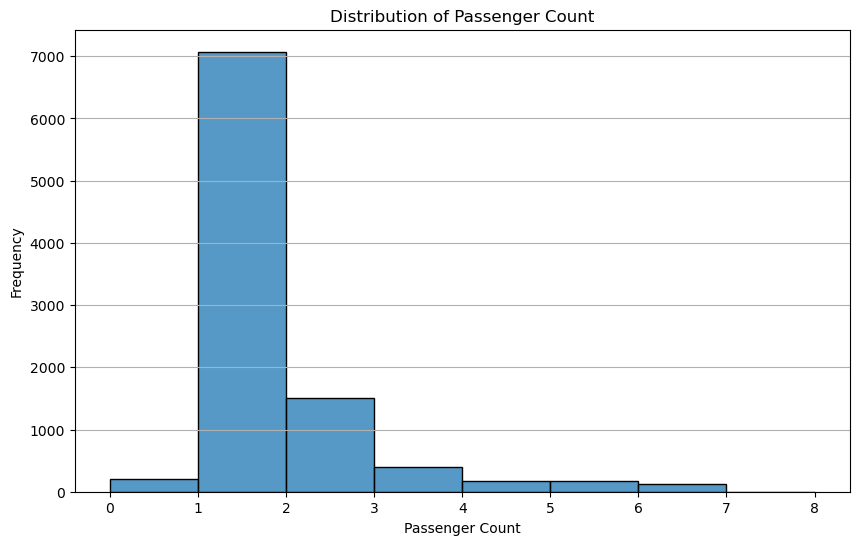

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for passenger_count
plt.figure(figsize=(10, 6))
sns.histplot(all_trips['passenger_count'].dropna(), kde=False, bins=range(int(all_trips['passenger_count'].max()) + 1))
plt.title('Distribution of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.xticks(range(int(all_trips['passenger_count'].max()) + 1))  # Ensure integer ticks
plt.grid(axis='y')
plt.show()


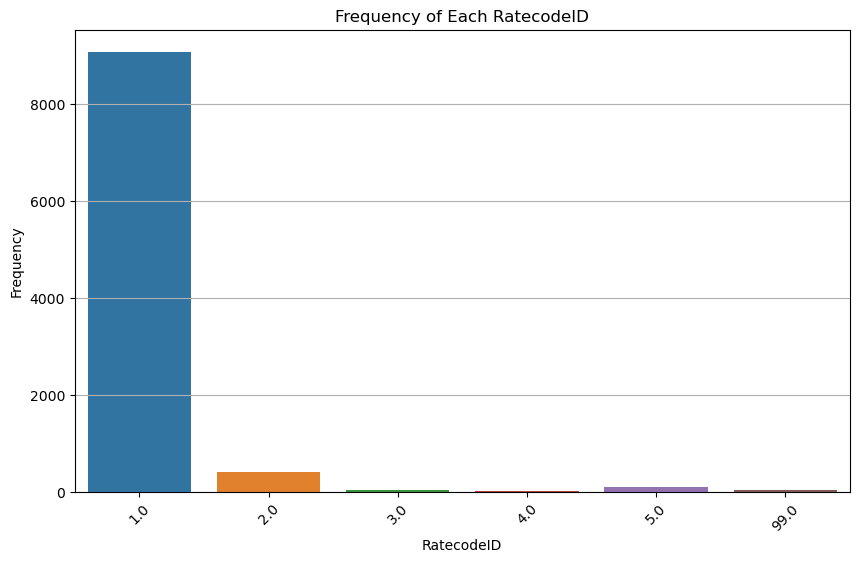

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
# Bar plot for RatecodeID
plt.figure(figsize=(10, 6))
ratecode_counts = all_trips['RatecodeID'].dropna().value_counts().sort_index()
sns.barplot(x=ratecode_counts.index, y=ratecode_counts.values)
plt.title('Frequency of Each RatecodeID')
plt.xlabel('RatecodeID')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate labels if necessary
plt.grid(axis='y')
plt.show()


In [63]:
# Handle missing values for 'passenger_count' and 'RatecodeID'
all_trips['passenger_count'].fillna(all_trips['passenger_count'].median(), inplace=True)
all_trips['RatecodeID'].fillna(all_trips['RatecodeID'].mode()[0], inplace=True)

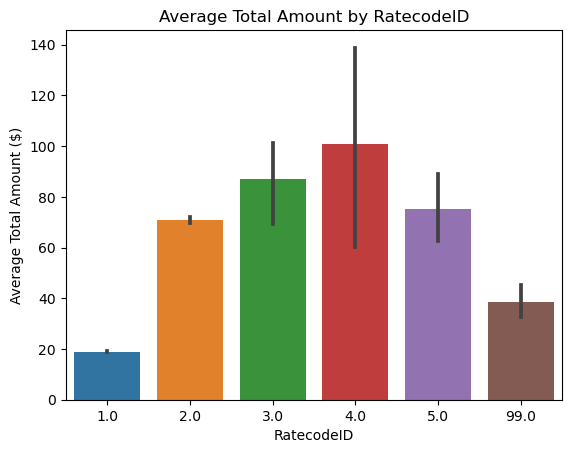

In [64]:
import numpy as np
sns.barplot(x='RatecodeID', y='total_amount', data=all_trips, estimator=np.mean)
plt.title('Average Total Amount by RatecodeID')
plt.xlabel('RatecodeID')
plt.ylabel('Average Total Amount ($)')
plt.show()

In [65]:
all_trips = all_trips[all_trips['RatecodeID'] <= 6]

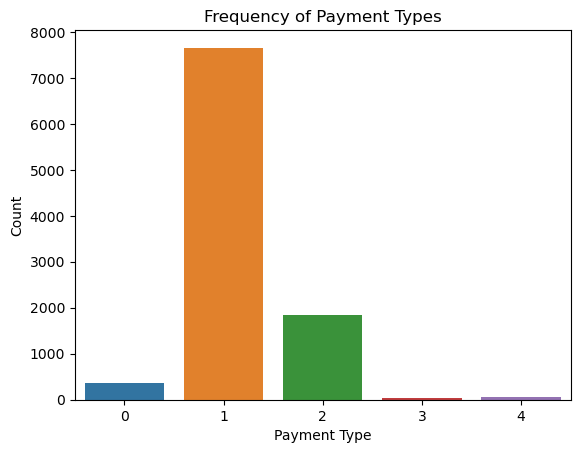

In [66]:
sns.countplot(x='payment_type', data=all_trips)
plt.title('Frequency of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()

In [67]:
all_trips = all_trips[all_trips['payment_type'] >= 0]

In [68]:
# Convert to categorical data types
categorical_columns = ['RatecodeID', 'payment_type']

for column in categorical_columns:
    all_trips[column] = all_trips[column].astype('category')


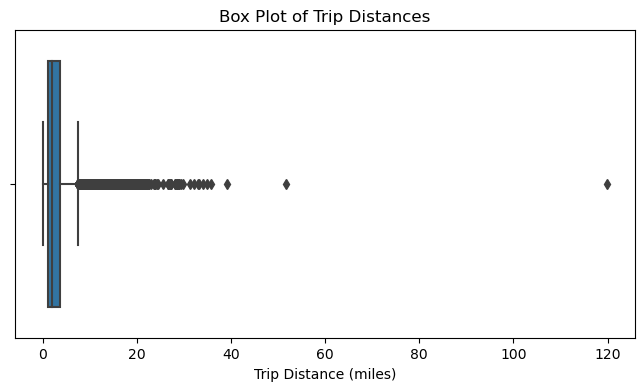

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
sns.boxplot(x=all_trips['trip_distance'])
plt.title('Box Plot of Trip Distances')
plt.xlabel('Trip Distance (miles)')
plt.show()

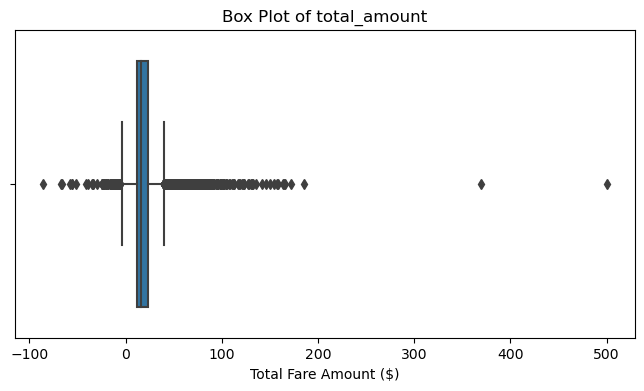

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
sns.boxplot(x=all_trips['total_amount'])
plt.title('Box Plot of total_amount')
plt.xlabel('Total Fare Amount ($)')
plt.show()

In [71]:
columns_to_check = ['total_amount']

# Count negative values for each column
negative_counts = {column: (all_trips[column] < 0).sum() for column in columns_to_check}

negative_counts


{'total_amount': 59}

In [72]:
all_trips = all_trips[~(all_trips[columns_to_check] < 0).any(axis=1)]
all_trips = all_trips[all_trips['total_amount'] <= 250]

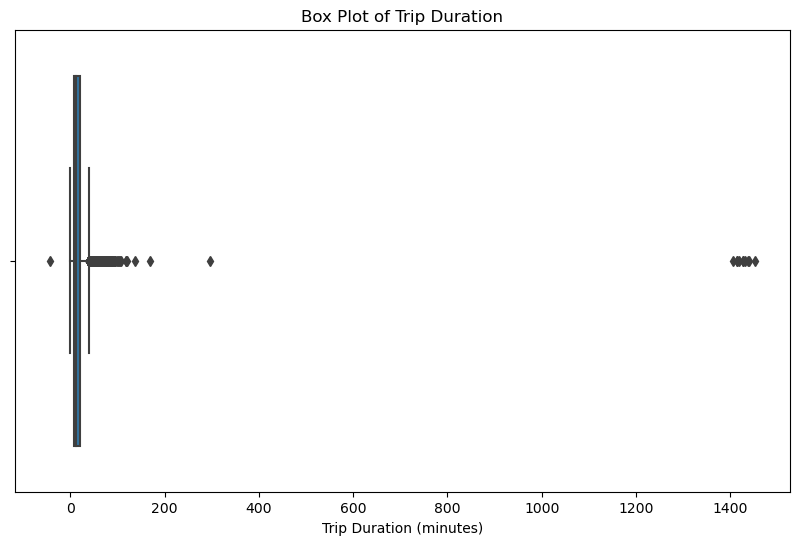

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=all_trips['trip_duration'])
plt.title('Box Plot of Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.show()

In [74]:
all_trips = all_trips[all_trips['trip_duration'] <= 100]

all_trips = all_trips[all_trips['trip_duration'] >= 0]



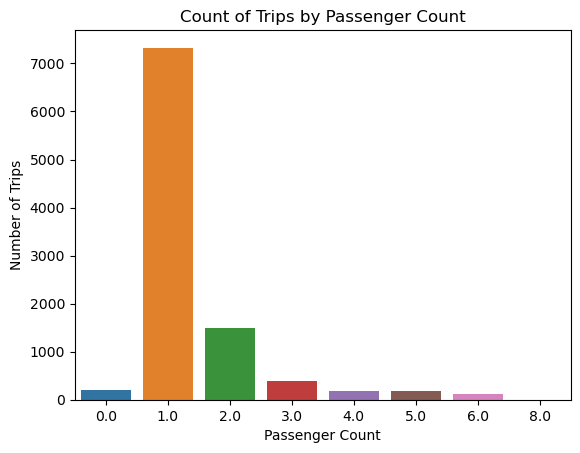

In [75]:
sns.countplot(x='passenger_count', data=all_trips)
plt.title('Count of Trips by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Number of Trips')
plt.show()


In [76]:
all_trips = all_trips[all_trips['passenger_count'] >= 0]
all_trips = all_trips[all_trips['passenger_count'] <= 6]


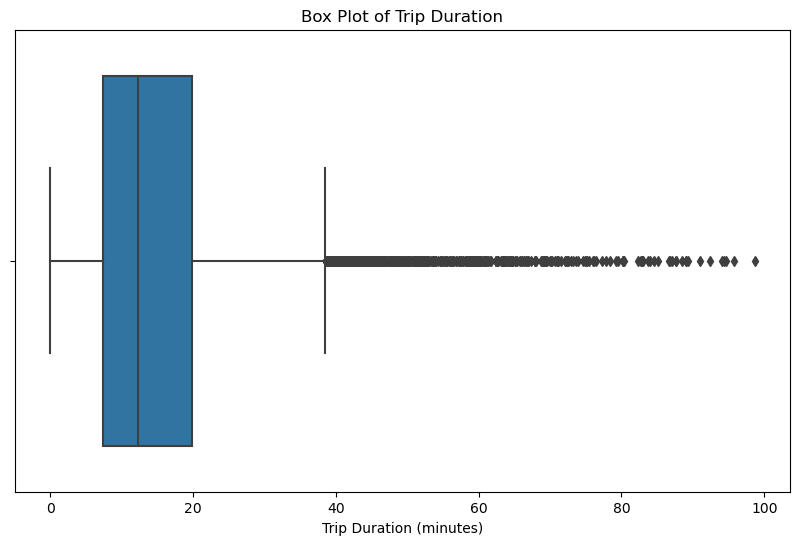

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=all_trips['trip_duration'])
plt.title('Box Plot of Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.show()

In [78]:
all_trips = all_trips[all_trips['trip_duration'] <= 100]

# This line will keep only the rows where trip_duration is 200 minutes or less

all_trips = all_trips[all_trips['trip_duration'] >= 0]

In [79]:
all_trips.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,trip_duration
0,2022-12-14 08:57:09,2022-12-14 09:17:38,1.0,3.79,1.0,13,68,1,24.36,20.483333
1,2022-08-28 13:22:42,2022-08-28 13:33:31,1.0,2.08,1.0,48,68,1,15.36,10.816667
2,2022-07-29 18:28:00,2022-07-29 18:45:10,3.0,2.08,1.0,233,50,1,18.30,17.166667
4,2022-07-26 00:01:06,2022-07-26 00:30:05,1.0,18.24,2.0,132,42,1,60.60,28.983333
5,2022-04-08 12:38:17,2022-04-08 13:11:12,2.0,9.12,1.0,70,238,1,41.60,32.916667


In [80]:
weather_data = pd.read_csv('weather_data.csv')

weather_data['date'] = pd.to_datetime(weather_data['date']).dt.date

# Step 2: Extract date from tpep_pickup_datetime for merging
all_trips['pickup_date'] = all_trips['tpep_pickup_datetime'].dt.date

# Step 3: Merge the datasets
merged_data = pd.merge(all_trips, weather_data, left_on='pickup_date', right_on='date', how='left')

# Now, merged_data contains taxi trip data along with the weather conditions for the pickup day

In [81]:
merged_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,trip_duration,pickup_date,date,PRCP,SNOW,SNWD,TMAX,TMIN
0,2022-12-14 08:57:09,2022-12-14 09:17:38,1.0,3.79,1.0,13,68,1,24.36,20.483333,2022-12-14,2022-12-14,0.00,0.0,0.0,39.0,31.0
1,2022-08-28 13:22:42,2022-08-28 13:33:31,1.0,2.08,1.0,48,68,1,15.36,10.816667,2022-08-28,2022-08-28,0.00,0.0,0.0,82.0,73.0
2,2022-07-29 18:28:00,2022-07-29 18:45:10,3.0,2.08,1.0,233,50,1,18.30,17.166667,2022-07-29,2022-07-29,0.10,0.0,0.0,85.0,72.0
3,2022-07-26 00:01:06,2022-07-26 00:30:05,1.0,18.24,2.0,132,42,1,60.60,28.983333,2022-07-26,2022-07-26,0.00,0.0,0.0,81.0,71.0
4,2022-04-08 12:38:17,2022-04-08 13:11:12,2.0,9.12,1.0,70,238,1,41.60,32.916667,2022-04-08,2022-04-08,0.03,0.0,0.0,65.0,49.0


In [82]:
# Load the taxi zone lookup dataset to understand its structure
taxi_zone_lookup_path = 'taxi+_zone_lookup.csv'
taxi_zone_lookup = pd.read_csv(taxi_zone_lookup_path)

# Display the first few rows of the dataset and summary information
taxi_zone_lookup_head = taxi_zone_lookup.head()
taxi_zone_lookup_info = taxi_zone_lookup.info()

taxi_zone_lookup_head, taxi_zone_lookup_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       265 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


(   LocationID        Borough                     Zone service_zone
 0           1            EWR           Newark Airport          EWR
 1           2         Queens              Jamaica Bay    Boro Zone
 2           3          Bronx  Allerton/Pelham Gardens    Boro Zone
 3           4      Manhattan            Alphabet City  Yellow Zone
 4           5  Staten Island            Arden Heights    Boro Zone,
 None)

In [84]:
# Merge for pickup location information
merged_data = pd.merge(merged_data, taxi_zone_lookup, how='left', left_on='PULocationID', right_on='LocationID')
merged_data.rename(columns={'Borough': 'pickup_borough', 'Zone': 'pickup_zone', 'service_zone': 'pickup_service_zone'}, inplace=True)

# Drop the now redundant 'LocationID' column from the first merge
merged_data.drop('LocationID', axis=1, inplace=True)

# Merge for dropoff location information
merged_data = pd.merge(merged_data, taxi_zone_lookup, how='left', left_on='DOLocationID', right_on='LocationID')
merged_data.rename(columns={'Borough': 'dropoff_borough', 'Zone': 'dropoff_zone', 'service_zone': 'dropoff_service_zone'}, inplace=True)

# Drop the now redundant 'LocationID' column from the second merge
merged_data.drop('LocationID', axis=1, inplace=True)

In [85]:
merged_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,trip_duration,...,pickup_service_zone,dropoff_borough,dropoff_zone,dropoff_service_zone,pickup_borough,pickup_zone,pickup_service_zone,dropoff_borough,dropoff_zone,dropoff_service_zone
0,2022-12-14 08:57:09,2022-12-14 09:17:38,1.0,3.79,1.0,13,68,1,24.36,20.483333,...,Yellow Zone,Manhattan,East Chelsea,Yellow Zone,Manhattan,Battery Park City,Yellow Zone,Manhattan,East Chelsea,Yellow Zone
1,2022-08-28 13:22:42,2022-08-28 13:33:31,1.0,2.08,1.0,48,68,1,15.36,10.816667,...,Yellow Zone,Manhattan,East Chelsea,Yellow Zone,Manhattan,Clinton East,Yellow Zone,Manhattan,East Chelsea,Yellow Zone
2,2022-07-29 18:28:00,2022-07-29 18:45:10,3.0,2.08,1.0,233,50,1,18.30,17.166667,...,Yellow Zone,Manhattan,Clinton West,Yellow Zone,Manhattan,UN/Turtle Bay South,Yellow Zone,Manhattan,Clinton West,Yellow Zone
3,2022-07-26 00:01:06,2022-07-26 00:30:05,1.0,18.24,2.0,132,42,1,60.60,28.983333,...,Airports,Manhattan,Central Harlem North,Boro Zone,Queens,JFK Airport,Airports,Manhattan,Central Harlem North,Boro Zone
4,2022-04-08 12:38:17,2022-04-08 13:11:12,2.0,9.12,1.0,70,238,1,41.60,32.916667,...,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,Queens,East Elmhurst,Boro Zone,Manhattan,Upper West Side North,Yellow Zone


In [86]:
columns_to_drop = ['pickup_zone', 'pickup_service_zone', 'dropoff_zone', 'dropoff_service_zone', 'pickup_date', 'SNWD']

# Drop the specified columns
merged_data.drop(columns=columns_to_drop, axis=1, inplace=True)

# Verify the columns have been dropped
print(merged_data.columns)

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'payment_type', 'total_amount', 'trip_duration', 'date', 'PRCP', 'SNOW',
       'TMAX', 'TMIN', 'pickup_borough', 'dropoff_borough', 'pickup_borough',
       'dropoff_borough'],
      dtype='object')


In [ ]:
merged_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,trip_duration,date,PRCP,SNOW,TMAX,TMIN,pickup_borough,dropoff_borough
0,2022-12-14 08:57:09,2022-12-14 09:17:38,1.0,3.79,1.0,13,68,1,24.36,20.483333,2022-12-14,0.00,0.0,39.0,31.0,Manhattan,Manhattan
1,2022-08-28 13:22:42,2022-08-28 13:33:31,1.0,2.08,1.0,48,68,1,15.36,10.816667,2022-08-28,0.00,0.0,82.0,73.0,Manhattan,Manhattan
2,2022-07-29 18:28:00,2022-07-29 18:45:10,3.0,2.08,1.0,233,50,1,18.30,17.166667,2022-07-29,0.10,0.0,85.0,72.0,Manhattan,Manhattan
3,2022-07-26 00:01:06,2022-07-26 00:30:05,1.0,18.24,2.0,132,42,1,60.60,28.983333,2022-07-26,0.00,0.0,81.0,71.0,Queens,Manhattan
4,2022-04-08 12:38:17,2022-04-08 13:11:12,2.0,9.12,1.0,70,238,1,41.60,32.916667,2022-04-08,0.03,0.0,65.0,49.0,Queens,Manhattan


In [ ]:
merged_data['Tavg'] = (merged_data['TMAX'] + merged_data['TMIN']) / 2
merged_data.drop(columns=['TMAX', 'TMIN'], axis=1, inplace=True)
# Verify the new column
print(merged_data['Tavg'].head())



0    35.0
1    77.5
2    78.5
3    76.0
4    57.0
Name: Tavg, dtype: float64


In [ ]:
# Convert datetime to just time (string format)
merged_data['tpep_pickup_time'] = merged_data['tpep_pickup_datetime'].dt.time.astype(str)
merged_data['tpep_dropoff_time'] = merged_data['tpep_dropoff_datetime'].dt.time.astype(str)

# Remove leading and trailing spaces
merged_data['tpep_pickup_time'] = merged_data['tpep_pickup_time'].apply(lambda x: x.strip())
merged_data['tpep_dropoff_time'] = merged_data['tpep_dropoff_time'].apply(lambda x: x.strip())

merged_data.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)
# Verify the changes
print(merged_data[['tpep_pickup_time', 'tpep_dropoff_time']].head())



  tpep_pickup_time tpep_dropoff_time
0         08:57:09          09:17:38
1         13:22:42          13:33:31
2         18:28:00          18:45:10
3         00:01:06          00:30:05
4         12:38:17          13:11:12


In [ ]:
merged_data.dtypes

passenger_count       float64
trip_distance         float64
RatecodeID           category
PULocationID            int64
DOLocationID            int64
payment_type         category
total_amount          float64
trip_duration         float64
date                   object
PRCP                  float64
SNOW                  float64
pickup_borough         object
dropoff_borough        object
Tavg                  float64
tpep_pickup_time       object
tpep_dropoff_time      object
dtype: object

In [ ]:
merged_data.drop(columns=['PULocationID', 'DOLocationID'], axis=1, inplace=True)

In [ ]:
merged_data.dtypes

passenger_count       float64
trip_distance         float64
RatecodeID           category
payment_type         category
total_amount          float64
trip_duration         float64
date                   object
PRCP                  float64
SNOW                  float64
pickup_borough         object
dropoff_borough        object
Tavg                  float64
tpep_pickup_time       object
tpep_dropoff_time      object
dtype: object

In [ ]:
# Convert passenger_count to the smallest possible integer type
merged_data['passenger_count'] = pd.to_numeric(merged_data['passenger_count'].fillna(0).astype(int), downcast='integer')

# Convert date to datetime
merged_data['date'] = pd.to_datetime(merged_data['date'])

# Convert pickup_borough and dropoff_borough to category
merged_data['pickup_borough'] = merged_data['pickup_borough'].astype('category')
merged_data['dropoff_borough'] = merged_data['dropoff_borough'].astype('category')

# Convert PRCP and SNOW to float32 for memory efficiency
merged_data['PRCP'] = merged_data['PRCP'].astype('float32')
merged_data['SNOW'] = merged_data['SNOW'].astype('float32')

# Extract time from datetime
merged_data['tpep_pickup_time'] = pd.to_datetime(merged_data['tpep_pickup_time'], errors='coerce')
merged_data['tpep_dropoff_time'] = pd.to_datetime(merged_data['tpep_dropoff_time'], errors='coerce')
merged_data['tpep_pickup_time'] = merged_data['tpep_pickup_time'].dt.time
merged_data['tpep_dropoff_time'] = merged_data['tpep_dropoff_time'].dt.time



C:\Users\varun\AppData\Local\Temp\ipykernel_23596\3569604889.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['tpep_pickup_time'] = pd.to_datetime(merged_data['tpep_pickup_time'], errors='coerce')
C:\Users\varun\AppData\Local\Temp\ipykernel_23596\3569604889.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['tpep_dropoff_time'] = pd.to_datetime(merged_data['tpep_dropoff_time'], errors='coerce')


In [ ]:
merged_data.dtypes

passenger_count                int8
trip_distance               float64
RatecodeID                 category
payment_type               category
total_amount                float64
trip_duration               float64
date                 datetime64[ns]
PRCP                        float32
SNOW                        float32
pickup_borough             category
dropoff_borough            category
Tavg                        float64
tpep_pickup_time             object
tpep_dropoff_time            object
dtype: object

In [ ]:
merged_data.head()

,passenger_count,trip_distance,RatecodeID,payment_type,total_amount,trip_duration,date,PRCP,SNOW,pickup_borough,dropoff_borough,Tavg,tpep_pickup_time,tpep_dropoff_time
0,1,3.79,1.0,1,24.36,20.483333,2022-12-14,0.00,0.0,Manhattan,Manhattan,35.0,08:57:09,09:17:38
1,1,2.08,1.0,1,15.36,10.816667,2022-08-28,0.00,0.0,Manhattan,Manhattan,77.5,13:22:42,13:33:31
2,3,2.08,1.0,1,18.30,17.166667,2022-07-29,0.10,0.0,Manhattan,Manhattan,78.5,18:28:00,18:45:10
3,1,18.24,2.0,1,60.60,28.983333,2022-07-26,0.00,0.0,Queens,Manhattan,76.0,00:01:06,00:30:05
4,2,9.12,1.0,1,41.60,32.916667,2022-04-08,0.03,0.0,Queens,Manhattan,57.0,12:38:17,13:11:12


In [ ]:
merged_data.dtypes

passenger_count                int8
trip_distance               float64
RatecodeID                 category
payment_type               category
total_amount                float64
trip_duration               float64
date                 datetime64[ns]
PRCP                        float32
SNOW                        float32
pickup_borough             category
dropoff_borough            category
Tavg                        float64
tpep_pickup_time             object
tpep_dropoff_time            object
dtype: object

In [ ]:
merged_data.to_csv('merged_dataset.csv', index= False)